In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
set_always = pd.read_csv('set_always.csv')
set_always = set_always.drop(columns=['Unnamed: 0'])
set_always['follow'] = 1
set_never = pd.read_csv('set_never.csv')
set_never = set_never.drop(columns=['Unnamed: 0'])
set_never['follow'] = 0
shar = pd.read_csv('shar.csv')
shar = shar.drop(columns=['Unnamed: 0'])
df = pd.read_csv('df.csv')
df = df.drop(columns=['Unnamed: 0'])

In [3]:
train = pd.concat([set_always,set_never])
print(train)

           Company name   Deal date  Investment amount filing_date  \
0           City Pantry  2018-01-13            42336.0  2018-03-13   
1           City Pantry  2018-01-13            42336.0  2018-03-13   
2           City Pantry  2018-01-13            42336.0  2018-03-13   
3      MWR InfoSecurity  2017-06-29          1300000.0  2018-05-20   
4         NewVoiceMedia  2018-03-27           116512.0  2018-06-28   
...                 ...         ...                ...         ...   
23259         Hostmaker  2016-09-20           849994.0  2016-12-03   
23260         Hostmaker  2016-09-20           849994.0  2016-12-03   
23261         Hostmaker  2016-09-20           849994.0  2016-12-03   
23262         Hostmaker  2017-11-07         11302995.0  2018-12-03   
23263             âcasă  2018-06-20          3286339.0  2018-07-19   

              Investor name  number_of_shares  percent_total Current stage  \
0            _ANGEL CO FUND          174939.0          5.681        Exited   
1  

In [4]:
df_copy = df.loc[:,['Company name','filing_date','Investment amount']]
df_copy = df_copy.drop_duplicates(subset=None, keep='last', inplace=False)
shar_df = pd.merge(df_copy,shar,on=['Company name','filing_date'],how='left')
# shar_df = shar_df.dropna()
shar_df = shar_df.loc[(shar_df['round_shares']>0)]
shar_df = shar_df.drop_duplicates(subset=None, keep='last', inplace=False)
shar_df['shares_value'] = shar_df['Investment amount']/shar['round_shares']
shar_df = shar_df.sort_values(by=['Company name','filing_date'])
shar_df.head()

,Company name,filing_date,Investment amount,total_shares,round_shares,exit_shares,rounds,shares_value
1,201 Software,2017-09-03,29999.0,1.974708e+04,1.974608e+04,2.030000e+03,3.0,0.029999
3,2BE Technology,2015-12-18,80000.0,5.200208e+04,5.200208e+04,5.200208e+04,1.0,0.171487
6,3-Cs,2013-06-29,333882.0,2.032520e+06,2.032520e+06,2.849003e+06,3.0,10433.059350
5,3-Cs,2014-06-29,117250.0,2.453988e+06,4.214674e+05,2.849003e+06,3.0,1172.500000
4,3-Cs,2015-06-29,196000.0,2.849003e+06,3.950151e+05,2.849003e+06,3.0,0.969287


In [5]:
shar_df['value_change'] = ''
length_column = shar_df.shape[0]
for i in range(0,length_column):
    if shar_df['Company name'].iloc[i] == shar_df['Company name'].iloc[i-1]:
        shar_df['value_change'].iloc[i] = shar_df['shares_value'].iloc[i]/shar_df['shares_value'].iloc[i-1]*shar_df['value_change'].iloc[i-1]
    else:
        shar_df['value_change'].iloc[i] = 1

C:\Users\asus\Anaconda3\envs\mlp\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-5-6e42bc3f74dc>:5: RuntimeWarning: divide by zero encountered in double_scalars
  shar_df['value_change'].iloc[i] = shar_df['shares_value'].iloc[i]/shar_df['shares_value'].iloc[i-1]*shar_df['value_change'].iloc[i-1]
<ipython-input-5-6e42bc3f74dc>:5: RuntimeWarning: invalid value encountered in double_scalars
  shar_df['value_change'].iloc[i] = shar_df['shares_value'].iloc[i]/shar_df['shares_value'].iloc[i-1]*shar_df['value_change'].iloc[i-1]


In [6]:
value = shar_df.loc[:,['Company name','filing_date','value_change']]
# value['value_change'] = value['value_change'].astype('float')
value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 1 to 3340
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company name  2840 non-null   object
 1   filing_date   2840 non-null   object
 2   value_change  2832 non-null   object
dtypes: object(3)
memory usage: 88.8+ KB


In [7]:
values = pd.merge(train,value,on=['Company name','filing_date'],how='left')
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27856 entries, 0 to 27855
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company name        27856 non-null  object 
 1   Deal date           27856 non-null  object 
 2   Investment amount   27856 non-null  float64
 3   filing_date         27856 non-null  object 
 4   Investor name       27856 non-null  object 
 5   number_of_shares    27856 non-null  float64
 6   percent_total       27856 non-null  float64
 7   Current stage       27856 non-null  object 
 8   Incorporation date  27414 non-null  object 
 9   Exit date           27856 non-null  object 
 10  Exit price          27856 non-null  float64
 11  total_shares        27856 non-null  float64
 12  round_shares        27856 non-null  float64
 13  exit_shares         27856 non-null  float64
 14  rounds              27856 non-null  int64  
 15  add_shares          4592 non-null   float64
 16  paid

In [8]:
# values.info()
# values.to_csv(r'values.csv')

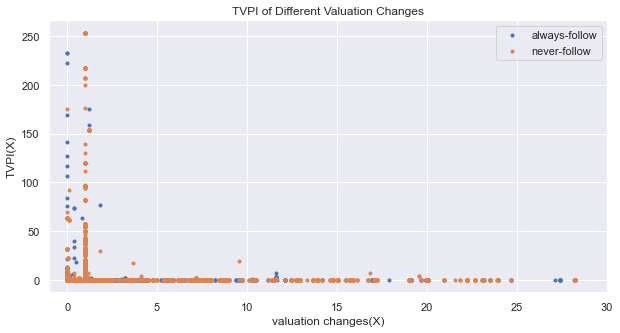

In [64]:
values = values.loc[(values['value_change']<30)]
values = values.loc[(values['value_change']>0)]
train_a = values.loc[(values['follow']==1)]
train_n = values.loc[(values['follow']==0)]
plt.figure(figsize=(10,5))
x_a = train_a['value_change'].values.tolist()
y_a = train_a['TVPI'].values.tolist()
x_n = train_n['value_change'].values.tolist()
y_n = train_n['TVPI'].values.tolist()
plt.scatter(x_a,y_a,marker='.',label='always-follow')
plt.scatter(x_n,y_n,marker='.',label='never-follow')
plt.xlim(-1,30)
plt.xlabel('valuation changes(X)')
plt.ylabel('TVPI(X)')
plt.legend()
plt.title("TVPI of Different Valuation Changes")
plt.show()

In [10]:
always_mean = np.mean(train_a['TVPI'].values.tolist())
always_20 = train_a.loc[(train_a['TVPI']>=20)].shape[0]
always_10 = train_a.loc[(train_a['TVPI']>=10)&(train_a['TVPI']<20)].shape[0]
always_5 = train_a.loc[(train_a['TVPI']>=5)&(train_a['TVPI']<10)].shape[0]
always_3 = train_a.loc[(train_a['TVPI']>=3)&(train_a['TVPI']<5)].shape[0]
always_1 = train_a.loc[(train_a['TVPI']>=1)&(train_a['TVPI']<3)].shape[0]
always_0 = train_a.loc[(train_a['TVPI']<1)].shape[0]
never_mean = np.mean(train_n['TVPI'].values.tolist())
never_20 = train_n.loc[(train_n['TVPI']>=20)].shape[0]
never_10 = train_n.loc[(train_n['TVPI']>=10)&(train_n['TVPI']<20)].shape[0]
never_5 = train_n.loc[(train_n['TVPI']>=5)&(train_n['TVPI']<10)].shape[0]
never_3 = train_n.loc[(train_n['TVPI']>=3)&(train_n['TVPI']<5)].shape[0]
never_1 = train_n.loc[(train_n['TVPI']>=1)&(train_n['TVPI']<3)].shape[0]
never_0 = train_n.loc[(train_n['TVPI']<1)].shape[0]

In [11]:
data = {'Always-Follow':[always_mean,always_0,always_1,always_3,always_5,always_10,always_20],
       'Never-Follow':[never_mean,never_0,never_1,never_3,never_5,never_10,never_20]}
count = pd.DataFrame(data,index=['mean TVPI','TVPI＜1','1≤TVPI＜3','3≤TVPI＜5','5≤TVPI＜10','10≤TVPI＜20','20≤TVPI'])
count

,Always-Follow,Never-Follow
mean TVPI,1.063024,2.382364
TVPI＜1,2626.000000,18052.000000
1≤TVPI＜3,19.000000,396.000000
3≤TVPI＜5,12.000000,51.000000
5≤TVPI＜10,27.000000,273.000000
10≤TVPI＜20,19.000000,396.000000
20≤TVPI,25.000000,521.000000


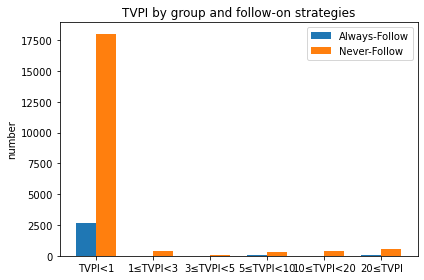

In [25]:
labels = ['TVPI<1','1≤TVPI<3','3≤TVPI<5','5≤TVPI<10','10≤TVPI<20','20≤TVPI']
always_y = [always_0,always_1,always_3,always_5,always_10,always_20]
never_y = [never_0,never_1,never_3,never_5,never_10,never_20]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, always_y, width, label='Always-Follow')
rects2 = ax.bar(x + width/2, never_y, width, label='Never-Follow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number')
ax.set_title('TVPI by group and follow-on strategies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [13]:
# always1 = train_a.loc[(train_a['TVPI']<1)].sample(n=100,random_state=33,axis=0)
# always2 = train_a.loc[(train_a['TVPI']>=1)]
# always_balanced = pd.concat([always1,always2])
# never1 = train_n.loc[(train_n['TVPI']<1)].sample(n=1000,random_state=33,axis=0)
# never2 = train_n.loc[(train_n['TVPI']>=1)]
# never_balanced = pd.concat([never1,never2])

In [14]:
# plt.figure(figsize=(10,5))
# x_ab = always_balanced['value_change'].values.tolist()
# y_ab = always_balanced['TVPI'].values.tolist()
# x_nb = never_balanced['value_change'].values.tolist()
# y_nb = never_balanced['TVPI'].values.tolist()
# plt.scatter(x_ab,y_ab,marker='.',color='brown',label='always-follow')
# plt.scatter(x_nb,y_nb,marker='.',color='navy',label='never-follow')
# plt.legend()
# plt.title("TVPI of Different Valuation Changes on Balanced Dataset")
# plt.show()

In [15]:
# data = {'Always-Follow':[always_mean,100,always_1,always_3,always_5,always_10,always_20],
#        'Never-Follow':[never_mean,1000,never_1,never_3,never_5,never_10,never_20]}
# count = pd.DataFrame(data,index=['mean TVPI','TVPI＜1','1≤TVPI＜3','3≤TVPI＜5','5≤TVPI＜10','10≤TVPI＜20','20≤TVPI'])
# count.head()

In [16]:
# labels = ['TVPI<1','1≤TVPI<3','3≤TVPI<5','5≤TVPI<10','10≤TVPI<20','20≤TVPI']
# always_y = [100,always_1,always_3,always_5,always_10,always_20]
# never_y = [1000,never_1,never_3,never_5,never_10,never_20]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, always_y, width, label='Always-Follow')
# rects2 = ax.bar(x + width/2, never_y, width, label='Never-Follow')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('number')
# ax.set_title('TVPI by group and follow-on strategies')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# # ax.bar_label(rects1, padding=3)
# # ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()

In [17]:
# train.round(2)
# ddf = train['value_change'].values.tolist()
# print(np.isnan(ddf).all())

# train_balanced = pd.concat([always_balanced,never_balanced])
# train_balanced.info()
print(train)

           Company name   Deal date  Investment amount filing_date  \
0           City Pantry  2018-01-13            42336.0  2018-03-13   
1           City Pantry  2018-01-13            42336.0  2018-03-13   
2           City Pantry  2018-01-13            42336.0  2018-03-13   
3      MWR InfoSecurity  2017-06-29          1300000.0  2018-05-20   
4         NewVoiceMedia  2018-03-27           116512.0  2018-06-28   
...                 ...         ...                ...         ...   
23259         Hostmaker  2016-09-20           849994.0  2016-12-03   
23260         Hostmaker  2016-09-20           849994.0  2016-12-03   
23261         Hostmaker  2016-09-20           849994.0  2016-12-03   
23262         Hostmaker  2017-11-07         11302995.0  2018-12-03   
23263             âcasă  2018-06-20          3286339.0  2018-07-19   

              Investor name  number_of_shares  percent_total Current stage  \
0            _ANGEL CO FUND          174939.0          5.681        Exited   
1  

In [18]:
X_filter = np.array(values.loc[:,['value_change','Investment amount','percent_total','rounds','follow']])
Y_filter = np.array(values['TVPI']).reshape(-1, 1)

print(f_regression(X_filter, Y_filter, center=True))

(array([12.0963148 ,  1.57693468,  6.61616607, 50.8680803 , 16.48911243]), array([5.06173835e-04, 2.09215870e-01, 1.01120939e-02, 1.01789490e-12,
       4.90964610e-05]))


C:\Users\asus\Anaconda3\envs\mlp\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
X = np.array(values.loc[:,['value_change','follow']])
Y = np.array(values['TVPI']).reshape(-1, 1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=44) #total 4540 samples

# svr_lr = SVR(kernel='linear', gamma='scale')
# svr_lr.fit(x_train, y_train)
# y_lr = svr_lr.predict(x_test)

svr_poly = SVR(kernel='poly', gamma='scale')
svr_poly.fit(x_train, y_train)
y_poly = svr_poly.predict(x_test)

# svr_rbf = SVR(kernel='rbf', gamma='scale')
# svr_rbf.fit(x_train, y_train)
# y_rbf = svr_rbf.predict(x_test)

C:\Users\asus\Anaconda3\envs\mlp\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# kernel = DotProduct() + WhiteKernel()
# gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(x_train,y_train)

In [ ]:
# print(gpr.score(x_train,y_train))
# y_pred_gpr = gpr.predict(x_test)

In [ ]:
# plt.figure(figsize=(10,5))
# plt.scatter(x_test,y_test,marker='.',color='brown',label='test')
# plt.plot(x_test,y_pred,marker='s',color='navy',label='pred')
# plt.title("TVPI of Different Valuation Changes")
# plt.show()

In [31]:
print((np.array(y_test) - np.array(y_poly)).mean()) #残差均值不为0

1.9302781683068255


In [103]:
# print('The mean squared error of Linear SVR is', mean_squared_error(y_test, y_lr))
print('The mean squared error of Poly SVR is', mean_squared_error(y_test, y_poly))
# print('The mean squared error of RBF SVR is', mean_squared_error(y_test, y_rbf))
# print('The mean absolute error of Linear SVR is', mean_absolute_error(y_test, y_lr))
print('The mean absolute error of Poly SVR is', mean_absolute_error(y_test, y_poly))
# print('The mean absolute error of RBF SVR is', mean_absolute_error(y_test, y_rbf))
# print('The explained variance score of Linear SVR is', explained_variance_score(y_test, y_lr))
print('The explained variance score of Poly SVR is', explained_variance_score(y_test, y_poly))
# print('The explained variance score of RBF SVR is', explained_variance_score(y_test, y_rbf))
# print('R-squared value of Linear SVR is', svr_lr.score(x_test,y_lr))
print('R-squared value of Poly SVR is', svr_poly.score(x_test,y_poly))
# print('R-squared value of RBF SVR is', svr_rbf.score(x_test,y_rbf))
r2_score = svr_poly.score(x_test,y_poly)
n = 27856
p = 2
r2_adjusted = 1-((1-r2_score)*(n-1))/(n-p-1)
print('The adjusted R-squared value of Poly SVR is', r2_adjusted)

The mean squared error of Poly SVR is 246.1904746314782
The mean absolute error of Poly SVR is 2.1140132920880883
The explained variance score of Poly SVR is 5.968316826199249e-06
R-squared value of Poly SVR is 1.0
The adjusted R-squared value of Poly SVR is 1.0


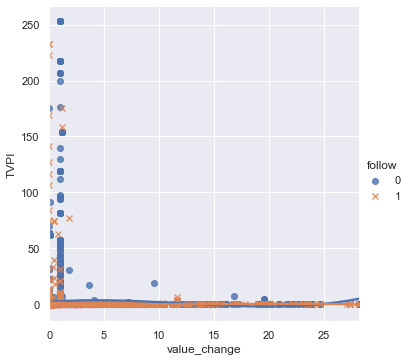

In [38]:
visual = values.loc[:,['value_change','follow','TVPI']]
visual['value_change'] = visual['value_change'].astype('float') 
sns.set_theme(color_codes=True)
# tips = sns.load_dataset("tips")
sns.lmplot(x="value_change", y="TVPI", hue="follow", order=3,data=visual,markers=["o", "x"]);

In [43]:
vc_mean = np.mean(values['value_change'].values.tolist())
vc_0_5 = values.loc[(values['value_change']<=0.5)].shape[0]
vc_0_75 = values.loc[(values['value_change']>0.5)&(values['value_change']<=0.75)].shape[0]
vc_1 = values.loc[(values['value_change']>0.75)&(values['value_change']<=1)].shape[0]
vc_1_5 = values.loc[(values['value_change']>1)&(values['value_change']<=1.5)].shape[0]
vc_2 = values.loc[(values['value_change']>1.5)&(values['value_change']<=2)].shape[0]
vc_5 = values.loc[(values['value_change']>2)&(values['value_change']<=5)].shape[0]
vc_10 = values.loc[(values['value_change']>5)&(values['value_change']<=10)].shape[0]
vc_11= values.loc[(values['value_change']>10)].shape[0]
data2 = {'Valuation changes':[vc_mean,vc_0_5,vc_0_75,vc_1,vc_1_5,vc_2,vc_5,vc_10,vc_11]}
count_vc = pd.DataFrame(data2,index=['mean vc','vc≤0.5','0.5＜vc≤0.75','0.75＜vc≤1','1＜vc≤1.5','1＜vc≤2','2＜vc≤5','5＜vc≤10','10＜vc'])
count_vc
# vc_1 = values.loc[(values['value_change']<1)].shape[0]

,Valuation changes
mean vc,1.411702
vc≤0.5,5240.000000
0.5＜vc≤0.75,336.000000
0.75＜vc≤1,14171.000000
1＜vc≤1.5,558.000000
1＜vc≤2,223.000000
2＜vc≤5,839.000000
5＜vc≤10,405.000000
10＜vc,645.000000


In [112]:
ts = values.loc[:,['value_change','follow']]

ts_0_5_0 = ts.loc[(values['value_change']<=0.5)]
ts_0_5_0['follow'] = 0
ts_0_5_0['TVPI'] = svr_poly.predict(np.array(ts_0_5_0.loc[:,['value_change','follow']]))*10
ts_0_5_0_mean = np.array(ts_0_5_0['TVPI']).mean()
ts_0_5_1 = ts.loc[(values['value_change']<=0.5)]
ts_0_5_1['follow'] = 1
ts_0_5_1['TVPI'] = svr_poly.predict(np.array(ts_0_5_1.loc[:,['value_change','follow']]))*10
ts_0_5_1_mean = np.array(ts_0_5_1['TVPI']).mean()

ts_0_75_0 = ts.loc[(values['value_change']>0.5)&(values['value_change']<=0.75)]
ts_0_75_0['follow'] = 0
ts_0_75_0['TVPI'] = svr_poly.predict(np.array(ts_0_75_0.loc[:,['value_change','follow']]))*10
ts_0_75_0_mean = np.array(ts_0_75_0['TVPI']).mean()
ts_0_75_1 = ts.loc[(values['value_change']>0.5)&(values['value_change']<=0.75)]
ts_0_75_1['follow'] = 1
ts_0_75_1['TVPI'] = svr_poly.predict(np.array(ts_0_75_1.loc[:,['value_change','follow']]))*10
ts_0_75_1_mean = np.array(ts_0_75_1['TVPI']).mean()

ts_1_0 = ts.loc[(values['value_change']>0.75)&(values['value_change']<=1)]
ts_1_0['follow'] = 0
ts_1_0['TVPI'] = svr_poly.predict(np.array(ts_1_0.loc[:,['value_change','follow']]))*10
ts_1_0_mean = np.array(ts_1_0['TVPI']).mean()
ts_1_1 = ts.loc[(values['value_change']>0.75)&(values['value_change']<=1)]
ts_1_1['follow'] = 1
ts_1_1['TVPI'] = svr_poly.predict(np.array(ts_1_1.loc[:,['value_change','follow']]))*10
ts_1_1_mean = np.array(ts_1_1['TVPI']).mean()

ts_1_5_0 = ts.loc[(values['value_change']>1)&(values['value_change']<=1.5)]
ts_1_5_0['follow'] = 0
ts_1_5_0['TVPI'] = svr_poly.predict(np.array(ts_1_5_0.loc[:,['value_change','follow']]))*10
ts_1_5_0_mean = np.array(ts_1_5_0['TVPI']).mean()
ts_1_5_1 = ts.loc[(values['value_change']>1)&(values['value_change']<=1.5)]
ts_1_5_1['follow'] = 1
ts_1_5_1['TVPI'] = svr_poly.predict(np.array(ts_1_5_1.loc[:,['value_change','follow']]))*10
ts_1_5_1_mean = np.array(ts_1_5_1['TVPI']).mean()

ts_2_0 = ts.loc[(values['value_change']>1.5)&(values['value_change']<=2)]
ts_2_0['follow'] = 0
ts_2_0['TVPI'] = svr_poly.predict(np.array(ts_2_0.loc[:,['value_change','follow']]))*10
ts_2_0_mean = np.array(ts_2_0['TVPI']).mean()
ts_2_1 = ts.loc[(values['value_change']>1.5)&(values['value_change']<=2)]
ts_2_1['follow'] = 1
ts_2_1['TVPI'] = svr_poly.predict(np.array(ts_2_1.loc[:,['value_change','follow']]))*10
ts_2_1_mean = np.array(ts_2_1['TVPI']).mean()

ts_5_0 = ts.loc[(values['value_change']>2)&(values['value_change']<=5)]
ts_5_0['follow'] = 0
ts_5_0['TVPI'] = svr_poly.predict(np.array(ts_5_0.loc[:,['value_change','follow']]))*10
ts_5_0_mean = np.array(ts_5_0['TVPI']).mean()
ts_5_1 = ts.loc[(values['value_change']>2)&(values['value_change']<=5)]
ts_5_1['follow'] = 1
ts_5_1['TVPI'] = svr_poly.predict(np.array(ts_5_1.loc[:,['value_change','follow']]))*10
ts_5_1_mean = np.array(ts_5_1['TVPI']).mean()

ts_10_0 = ts.loc[(values['value_change']>5)&(values['value_change']<=10)]
ts_10_0['follow'] = 0
ts_10_0['TVPI'] = svr_poly.predict(np.array(ts_10_0.loc[:,['value_change','follow']]))*10
ts_10_0_mean = np.array(ts_10_0['TVPI']).mean()
ts_10_1 = ts.loc[(values['value_change']>5)&(values['value_change']<=10)]
ts_10_1['follow'] = 1
ts_10_1['TVPI'] = svr_poly.predict(np.array(ts_10_1.loc[:,['value_change','follow']]))*10
ts_10_1_mean = np.array(ts_10_1['TVPI']).mean()

ts_11_0 = ts.loc[(values['value_change']>10)]
ts_11_0['follow'] = 0
ts_11_0['TVPI'] = svr_poly.predict(np.array(ts_11_0.loc[:,['value_change','follow']]))*10
ts_11_0_mean = np.array(ts_11_0['TVPI']).mean()
ts_11_1 = ts.loc[(values['value_change']>10)]
ts_11_1['follow'] = 1
ts_11_1['TVPI'] = svr_poly.predict(np.array(ts_11_1.loc[:,['value_change','follow']]))*10
ts_11_1_mean = np.array(ts_11_1['TVPI']).mean()

<ipython-input-112-ee365493e9ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_0_5_0['follow'] = 0
<ipython-input-112-ee365493e9ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_0_5_0['TVPI'] = svr_poly.predict(np.array(ts_0_5_0.loc[:,['value_change','follow']]))*10
<ipython-input-112-ee365493e9ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

<ipython-input-112-ee365493e9ac>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_5_1['TVPI'] = svr_poly.predict(np.array(ts_5_1.loc[:,['value_change','follow']]))*10
<ipython-input-112-ee365493e9ac>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_10_0['follow'] = 0
<ipython-input-112-ee365493e9ac>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [113]:
data3 = {'number of samples':['(total)27856',vc_0_5,vc_0_75,vc_1,vc_1_5,vc_2,vc_5,vc_10,vc_11],
         'mean Not-Follow TVPI':['/',ts_0_5_0_mean,ts_0_75_0_mean,ts_1_0_mean,ts_1_5_0_mean,ts_2_0_mean,ts_5_0_mean,ts_10_0_mean,ts_11_0_mean],
         'mean Follow TVPI':['/',ts_0_5_1_mean,ts_0_75_1_mean,ts_1_1_mean,ts_1_5_1_mean,ts_2_1_mean,ts_5_1_mean,ts_10_1_mean,ts_11_1_mean],
        'Better Follow-on Strategies':['/','Follow','Not-Follow','Not-Follow','Not-Follow','Not-Follow','Not-Follow','Follow','Follow']}
count_vc2 = pd.DataFrame(data3,index=['mean vc=1.41','vc≤0.50','0.50＜vc≤0.75','0.75＜vc≤1.00','1.00＜vc≤1.50','1.50＜vc≤2.00','2.00＜vc≤5.00','5.00＜vc≤10.00','10.00＜vc'])
count_vc2

,number of samples,mean Not-Follow TVPI,mean Follow TVPI,Better Follow-on Strategies
mean vc=1.41,(total)27856,/,/,/
vc≤0.50,5240,1.000973,1.000979,Follow
0.50＜vc≤0.75,336,1.000966,1.000758,Not-Follow
0.75＜vc≤1.00,14171,1.000948,1.000635,Not-Follow
1.00＜vc≤1.50,558,1.000925,1.00056,Not-Follow
1.50＜vc≤2.00,223,1.000825,1.000366,Not-Follow
2.00＜vc≤5.00,839,1.000078,0.999663,Not-Follow
5.00＜vc≤10.00,405,0.990664,0.992267,Follow
10.00＜vc,645,0.871581,0.888779,Follow


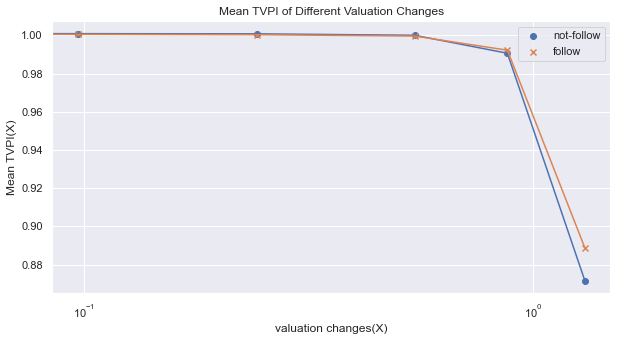

In [114]:
plt.figure(figsize=(10,5))
x = np.log10([0.25,0.625,0.875,1.25,1.75,3.5,7.5,20])
y1 = [ts_0_5_0_mean,ts_0_75_0_mean,ts_1_0_mean,ts_1_5_0_mean,ts_2_0_mean,ts_5_0_mean,ts_10_0_mean,ts_11_0_mean]
y2 = [ts_0_5_1_mean,ts_0_75_1_mean,ts_1_1_mean,ts_1_5_1_mean,ts_2_1_mean,ts_5_1_mean,ts_10_1_mean,ts_11_1_mean]
plt.scatter(x,y1,marker='o',label='not-follow')
plt.plot(x,y1)
plt.scatter(x,y2,marker='x',label='follow')
plt.plot(x,y2)
plt.xlabel('valuation changes(X)')
plt.ylabel('Mean TVPI(X)')
plt.xscale('log')
plt.legend()
plt.title("Mean TVPI of Different Valuation Changes")
plt.show()

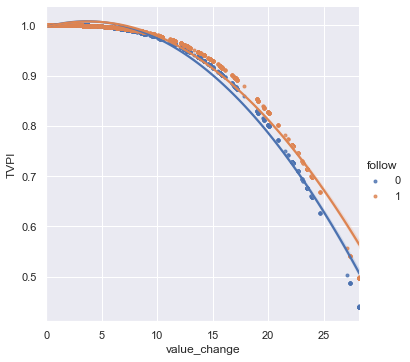

In [115]:
ts0 = pd.concat([ts_0_5_0,ts_0_75_0,ts_1_0,ts_1_5_0,ts_2_0,ts_5_0,ts_10_0,ts_11_0])
ts1 = pd.concat([ts_0_5_1,ts_0_75_1,ts_1_1,ts_1_5_1,ts_2_1,ts_5_1,ts_10_1,ts_11_1])
ts_visual = pd.concat([ts0,ts1])
ts_visual['value_change'] = ts_visual['value_change'].astype('float') 
sns.set_theme(color_codes=True)
sns.lmplot(x="value_change", y="TVPI", hue="follow", order=2,data=ts_visual,markers=[".", "."],ci=95);